In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
iris_data = pd.read_csv('C:\\Users\\a.kumar-e\\OneDrive - ARADA\\Desktop\\iris.csv')

# Define features and target
X = iris_data.iloc[:, :-1]
Y = iris_data.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Specify and create model
model = LogisticRegression()

# Train model
model.fit(X_train_scaled, Y_train)

# Evaluate the model
Y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Custom sample data
new_data = np.array([[5.1, 3.5, 1.4, 0.2],
                     [6.3, 2.9, 5.6, 1.8],
                     [4.9, 3.0, 1.4, 0.2]])
new_data_scaled = scaler.transform(new_data)

# Predictions
predictions = model.predict(new_data_scaled)
print(predictions)


Accuracy: 1.0
['Setosa' 'Virginica' 'Setosa']


C:\Users\a.kumar-e\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


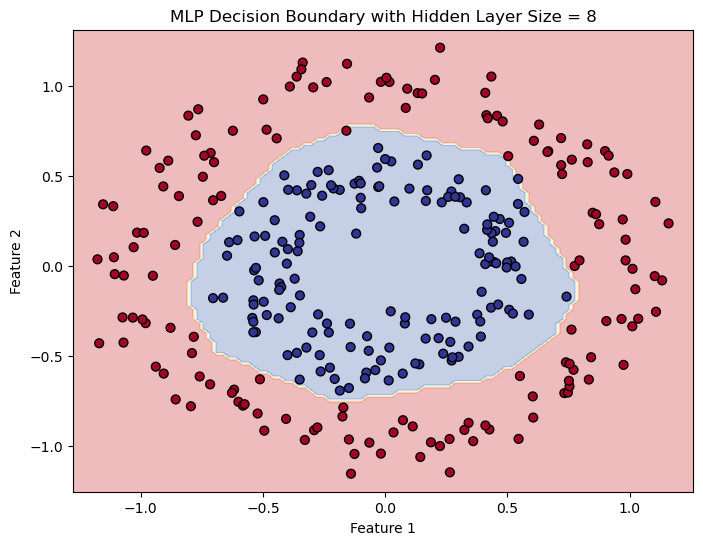

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier

# update plot
def update_plot(hidden_layer_size):
    
    # to generate random circles
    X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

    # MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', max_iter=3000, random_state=1)

    # putting classifier to the data
    clf.fit(X, y)

    # Create a grid of points for visualization
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)

    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    # Predict class labels for the grid points 
    Z = clf.predict(grid_points)

    Z = Z.reshape(X_plane.shape)

    # Plot the decision boundary and data points
    plt.figure(figsize=(8, 6))
    plt.contourf(X_plane, Y_plane, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title(f"MLP Decision Boundary with Hidden Layer Size = {hidden_layer_size}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

#prediction
update_plot(8)  # You can change the hidden layer size here
